Jon Nordby <jonnord@nmbu.no>


## Theory


### Insertion sort
### Merge sort
 
### Quicksort
### Heapsort
    

### Summary of expected execution times

Best, Average, Worst

Quicksort |	$n\log n$ | $n\log n$ |	$n^{2}$

Merge sort | $n\log ⁡n$ | $n\log ⁡n$ | $n\log ⁡n$

Heapsort | $n \log ⁡n$ | $n\log n$ | $n\log n$

Insertion sort 	$n$ | $n^{2}$ | $n^{2}$
    

https://en.wikipedia.org/wiki/Sorting_algorithm


## Methods


The methods section should include

    your algorithm implementations 
    test for correctness
    functions for generating test data
    functions to collect benchmark data

In addition to the actual code, the section should contain brief descriptions of the code. Provide docstrings, but avoid inline comments in Python code.

Also describe you strategy for collecting benchmark data.




### Test data generation

Test data should be automatically generated. As default items to be sorted, use NumPy arrays filled with integers, but also use strings. Test at least with the following types of data

    sorted in ascending order
    sorted in descending order
    identical values
    randomly shuffled data
    real-life data




In [98]:
%load_ext line_profiler

%matplotlib inline
import matplotlib

import math
import random
import time
import timeit
import statistics

import numpy
import pandas

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


### Correctness

Correctness is checked against Python as oracle


In [160]:
# TODO: test Numpy array with floats
# TODO: test strings
def test_sort(sort, N=10):
    for t in range(100): 
        d = randomarray(N)
        expected = sorted(d)
        
        out = d
        sort(out)
        assert out == expected, "{} != {}".format(out, expected)
        
        # TODO: return nicer testreport?
        return 'tests passed'

def python_sort(data):
    data.sort()
    return None
        
test_sort(python_sort)

'tests passed'

### Insertion sort


In [161]:
def insertion_sort(s):
    for i in range(1, len(s)):
        val = s[i]
        j = i - 1
        while j >= 0 and s[j] > val:
            s[j+1] = s[j]
            j = j - 1
        s[j+1] = val
    return s

test_sort(insertion_sort)

'tests passed'

### Merge sort


In [162]:
def merge_sentinel(arr, start, mid, end):
    # Add Infinity after the data, to always compare less when reading hits end
    left = arr[start:mid+1] + [math.inf]
    right = arr[mid+1:end+1] + [math.inf]
    l = 0
    r = 0
    for a in range(start, end+1):
        if left[l] <= right[r]:
            arr[a] = left[l]
            l += 1
        else:
            arr[a] = right[r]
            r += 1

def _merge_sort_sentinel(arr, start, end):
    if start < end:
        mid = int((start + end) / 2)
        _merge_sort_sentinel(arr, start, mid)
        _merge_sort_sentinel(arr, mid+1, end)
        merge_sentinel(arr, start, mid, end)
    return arr
    
def merge_sort_sentinel(arr):
    return _merge_sort_sentinel(arr, 0, len(arr)-1)


# Checking for empty instead of using Inf as sentinel value
def merge_check_empty(arr, start, mid, end):
    left = arr[start:mid+1]
    right = arr[mid+1:end+1]
    l = 0
    r = 0
    left_length = len(left)
    right_length = len(right)
    for a in range(start, end+1):
        if not l < left_length:
            # left has been exhausted, fill remaining right
            arr[a] = right[r]
            r += 1
        elif not r < right_length:
            # right has been exhausted, fill remaining left
            arr[a] = left[l]
            l += 1
        elif left[l] <= right[r]:
            arr[a] = left[l]
            l += 1
        else:
            arr[a] = right[r]
            r += 1

def _merge_sort_check(arr, start, end):
    if start < end:
        mid = int((start + end) / 2)
        _merge_sort_check(arr, start, mid)
        _merge_sort_check(arr, mid+1, end)
        merge_check_empty(arr, start, mid, end)
    return arr

def merge_sort_check(arr):
    return _merge_sort_check(arr, 0, len(arr)-1)

test_sort(merge_sort_sentinel)
test_sort(merge_sort_check)

'tests passed'

In [135]:
%timeit test_sort(merge_sort_check, N=10000)

1 loop, best of 3: 1.28 s per loop


In [137]:
%lprun -f _merge_sort_check test_sort(merge_sort_check, N=10000)

In [138]:
%lprun -f merge_check_empty test_sort(merge_sort_check, N=10000)

In [141]:
%lprun -f merge_sentinel test_sort(merge_sort_sentinel, N=10000)

### Heapsort

TODO: implement


In [169]:
# Note: recursive version of heapify available in assignment 4, but it was slower?
def max_heapify_iterative(H, length, top):
    p = top
    while True:
        l = 2*p + 1
        r = 2*p + 2
        largest = p
        if l < length and H[l] > H[largest]:
            largest = l
        if r < length and H[r] > H[largest]:
            largest = r
        if largest != p:
            H[largest], H[p] = H[p], H[largest]
            p = largest
        else:
            break

def build_max_heap_iterative(A, length):
    H = A
    for i in range(length//2, -1, -1):
        max_heapify_iterative(H, length, i)
    return H

def heapsort(A):
    length = len(A)
    build_max_heap_iterative(A, length)
    for i in range(length-1, 1, -1):
        A[1], A[i] = A[i], A[1]
        length -= 1
        max_heapify_iterative(A, length, 1)

test_sort(heapsort)

AssertionError: [266627, 234352, -217792, -195051, 133000, 135003, -93534, -25237, 3057, 60378] != [-217792, -195051, -93534, -25237, 3057, 60378, 133000, 135003, 234352, 266627]

### Quicksort



In [170]:
def partition(A, p, r):
    x = A[r]
    i = p-1
    for j in range(p, r-1):
        if A[j] <= x:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]
    return i+1

def _quicksort(A, p, r):
    if p < r:
        q = partition(A, p, r)
        _quicksort(A, p, q-1)
        _quicksort(A, q+1, r)
    
def quicksort(A):
    return _quicksort(A, 0, len(A)-1)

test_sort(quicksort)

AssertionError: [-55921, -181319, 116359, 170109, 203883, 182417, 232763, 270950, 283059, 278964] != [-181319, -55921, 116359, 170109, 182417, 203883, 232763, 270950, 278964, 283059]

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]


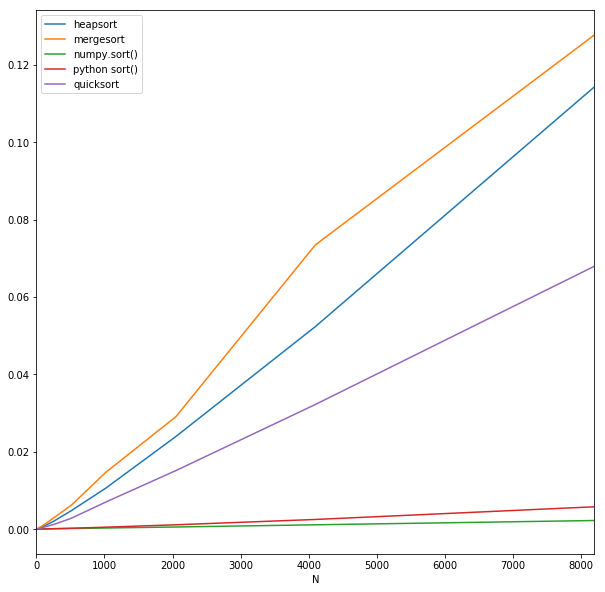

In [165]:

def numpy_sort(data):
    numpy.sort(data)

def randomarray(length):
    return [random.randint(-300000, 300000) for _ in range(length)]
    #r = numpy.random.random(length)
    #low = -300000
    #high = 300000
    #return (high - low) * r + low

def benchmark_sort(sort, data, number=1):
    # FIXME: use autorange to determine number, do re
    # FIXME: copy() the data and do repetitions
    # FIXME: run just copy alone and check that it is very low influence (or subtract it)
    # FIXME: return data normalized per run (divide by number of executions).
    # TODO: return not just min value?
    timer = timeit.Timer('sort(data)', globals=locals())
    times = timer.repeat(repeat=1, number=number) # XXX: cannot use repeat, because first run sorts the data
    best = min(times)
    return best
            
N = [ 2**i for i in range(1, 14) ]
print(N)
inputs = [ randomarray(n) for n in N ]
df = pandas.DataFrame({
    'N': N,
    #'O(n^2)': [ 0.00000003*(n**2) for n in N ],
    #'O(n log n)': [ 0.000004 * n * math.log(n, 2) for n in N ],
    #'O(n)': [ 0.000004 * n for n in N ],
    #'insertionsort': [ benchmark_sort(insertion_sort, i.copy()) for i in inputs ],
    'python sort()': [ benchmark_sort(python_sort, i.copy()) for i in inputs ],
    #'mergesort': [ benchmark_sort(merge_sort_sentinel, i.copy()) for i in inputs ],
    'mergesort': [ benchmark_sort(merge_sort_check, i.copy()) for i in inputs ],
    'heapsort': [ benchmark_sort(heapsort, i.copy()) for i in inputs ],
    'quicksort': [ benchmark_sort(quicksort, i.copy()) for i in inputs ],
    'numpy.sort()': [ benchmark_sort(numpy_sort, i.copy()) for i in inputs ],
})
df.plot(x='N', figsize=(10, 10))
            

## Results

TODO: for each sort function, plot results acrosss N on different input data distributions

Results should contain notebook cells generating benchmark data and graphics showing that data, including brief descriptions of the observations.

ou should attempt going to at least 1 million entries, except for insertion sort, where you probably need to stop for much smaller data sizes

Plot execution times for different N, for each algo

Maybe plot distribution of times for a given N and algo. Indicator of measurement variation

TODO: compare against include python stardard `.sort()` / `sorted()` ?
TODO: compare against Numpy sort?
TODO: compare methods using Numba/Cython

## Discussion

Discuss your results in light of the expectations from the theoretical runtime analysis we performed in class for different types of test data. Comment on unexpected or surprising results. Try to interpret your results.

## Conclusions